<a href="https://colab.research.google.com/github/SAYAN-2000/Air-quality-prediction/blob/main/Air_pollution_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.layers import Dropout


In [3]:
data = pd.read_csv("city_day.csv")
data.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
data.drop(axis=1,columns=['Date']).describe(include='all')


,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
count,29531,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000,24850
unique,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,Ahmedabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate
freq,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8829
mean,NaN,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581,NaN
std,NaN,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585,NaN
min,NaN,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,NaN
25%,NaN,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000,NaN
50%,NaN,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000,NaN
75%,NaN,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000,NaN


In [5]:
data.drop(axis=1,columns=['Date']).groupby(['City'])['AQI_Bucket'].agg(pd.Series.mode)


City
Ahmedabad                   Severe
Aizawl                        Good
Amaravati             Satisfactory
Amritsar              Satisfactory
Bengaluru             Satisfactory
Bhopal                    Moderate
Brajrajnagar              Moderate
Chandigarh            Satisfactory
Chennai               Satisfactory
Coimbatore            Satisfactory
Delhi                         Poor
Ernakulam             Satisfactory
Gurugram                  Moderate
Guwahati              Satisfactory
Hyderabad                 Moderate
Jaipur                    Moderate
Jorapokhar                Moderate
Kochi                 Satisfactory
Kolkata               Satisfactory
Lucknow                   Moderate
Mumbai                Satisfactory
Patna                     Moderate
Shillong                      Good
Talcher                   Moderate
Thiruvananthapuram    Satisfactory
Visakhapatnam             Moderate
Name: AQI_Bucket, dtype: object

In [6]:
data['Date']=pd.to_datetime(data['Date'])
data.Date.dt.year


0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
29526    2020
29527    2020
29528    2020
29529    2020
29530    2020
Name: Date, Length: 29531, dtype: int64

In [7]:
pm2=data.groupby(['City',(data.Date.dt.year), (data.Date.dt.month)])['PM2.5'].mean()


In [8]:
data_mean_month=pd.DataFrame({'City':[i[0] for i in pm2.index],'Date':[i[1] for i in pm2.index],'month':[i[2] for i in pm2.index],'pm2.5':pm2.values})
data_mean_month

,City,Date,month,pm2.5
0,Ahmedabad,2015,1,82.682500
1,Ahmedabad,2015,2,116.101600
2,Ahmedabad,2015,3,110.469333
3,Ahmedabad,2015,4,101.682000
4,Ahmedabad,2015,5,74.919355
...,...,...,...,...
1000,Visakhapatnam,2020,3,29.253226
1001,Visakhapatnam,2020,4,16.665000
1002,Visakhapatnam,2020,5,17.795806
1003,Visakhapatnam,2020,6,23.421667


In [9]:
data_y=pd.to_datetime(data_mean_month['Date'].astype(str)+ '-'  + data_mean_month['month'].astype(int).astype(str)+'-1', format = '%Y-%m')

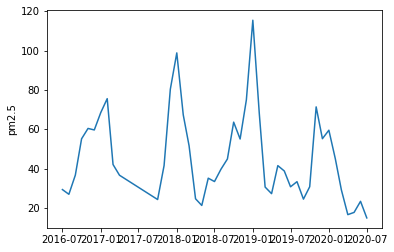

In [11]:
sns.lineplot(y=data_mean_month[data_mean_month['City']=='Visakhapatnam']['pm2.5'],x=data_y )
columns=list(set(list(data.columns))-set(['City','AQI_Bucket','Date']))

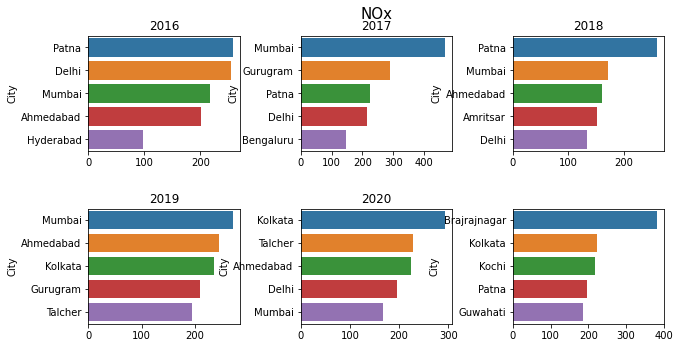

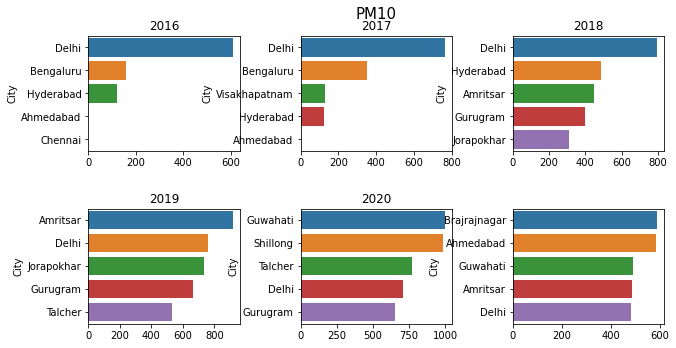

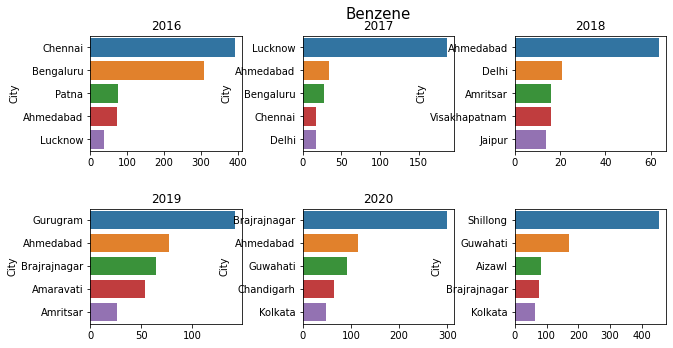

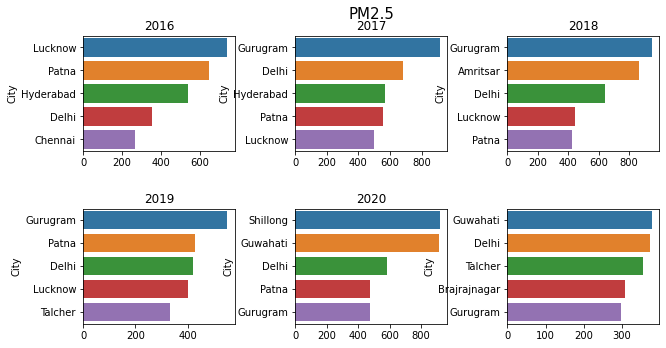

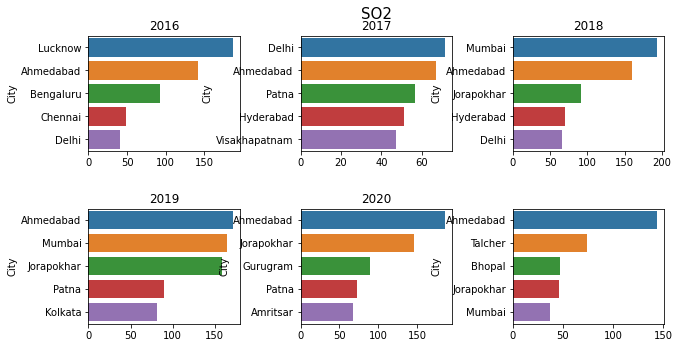

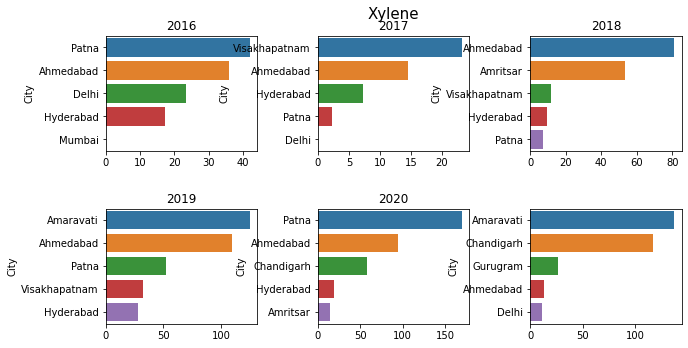

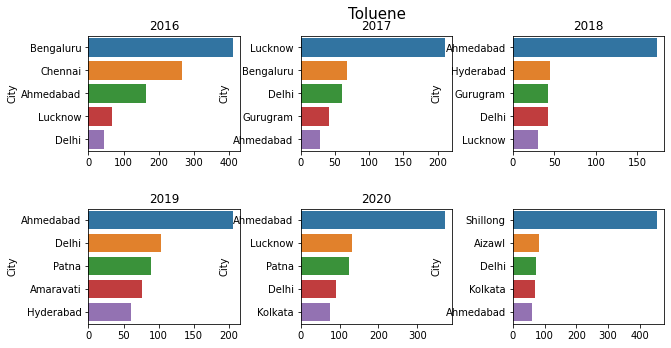

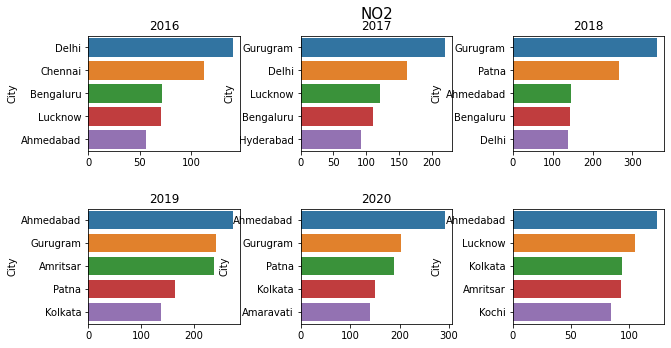

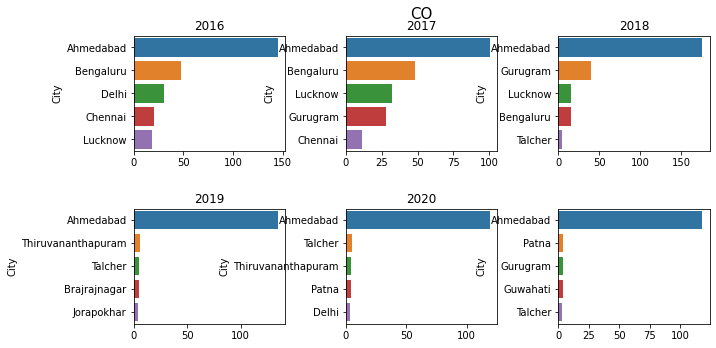

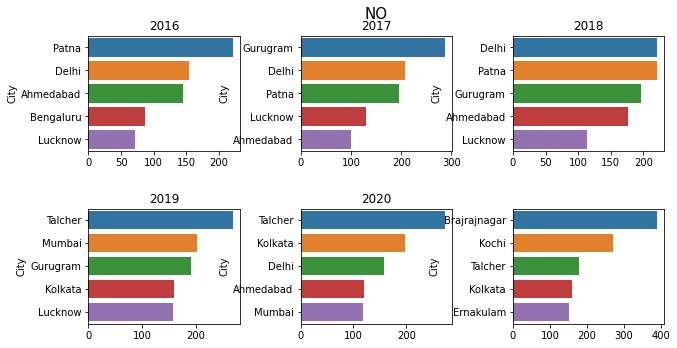

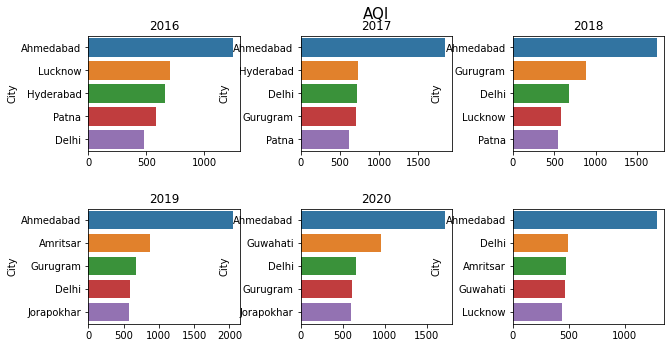

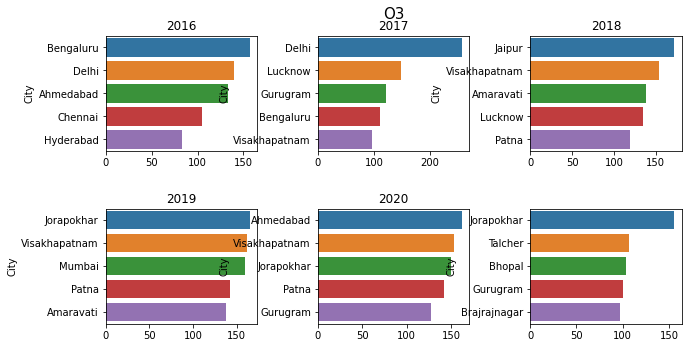

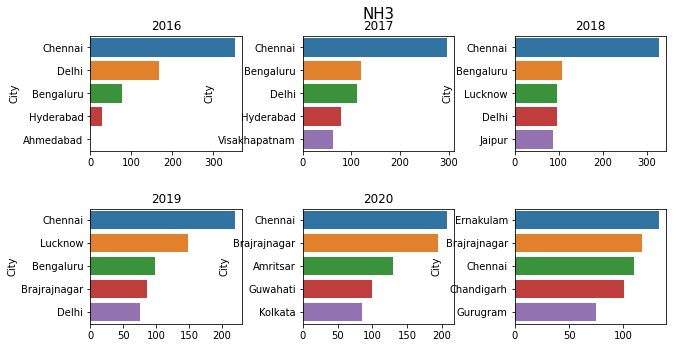

In [14]:
for j in columns :
    plt.figure(figsize = (10, 5))
    plt.suptitle(j, fontsize=15)
    for x,i in enumerate(data.Date.dt.year.unique()):
        plt.title(str(i))
        df=data[data.Date.dt.year==i].groupby(['City'])[j].max().sort_values(ascending=False).head(5) 
        plt.subplot(2, 3, 1+x)
        plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.5)
        sns.barplot( x=df.values, y=df.index)
    

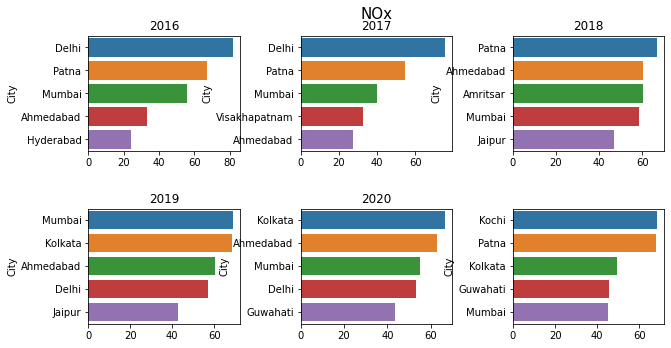

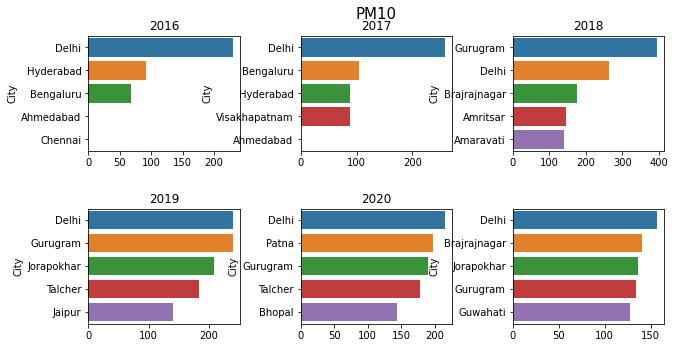

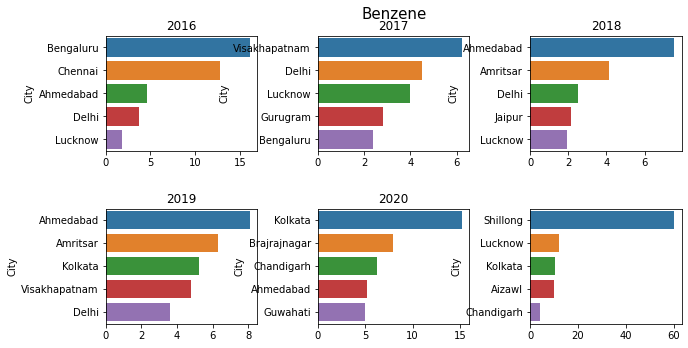

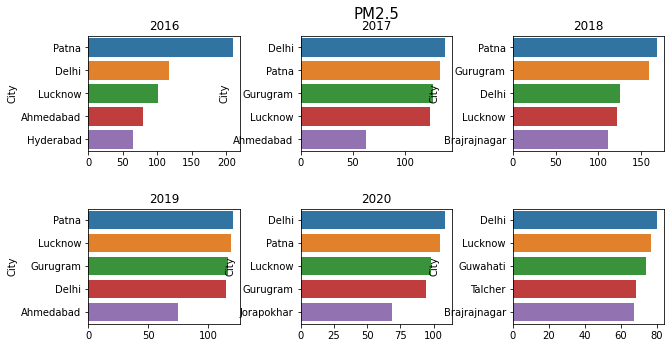

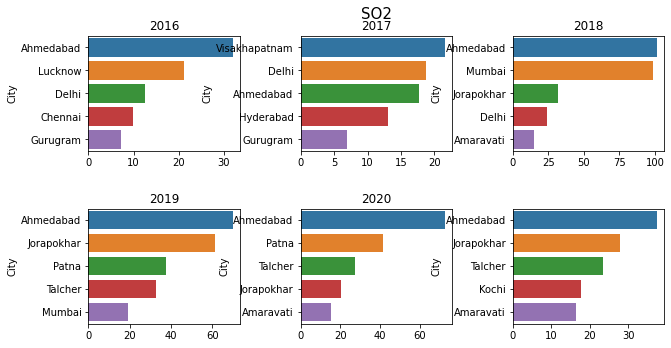

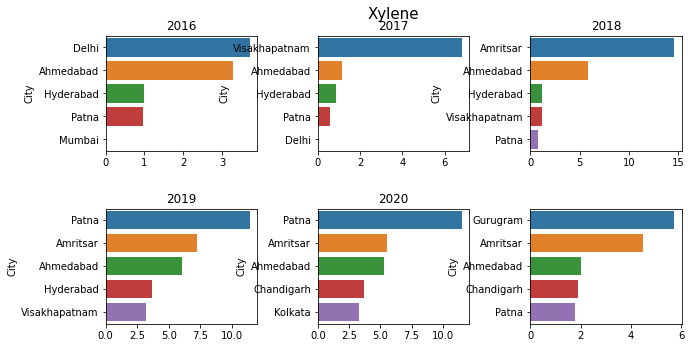

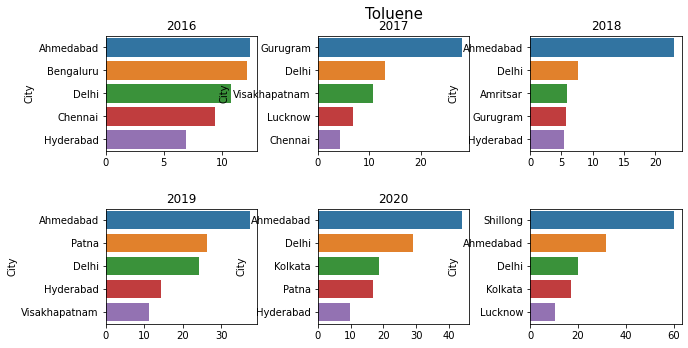

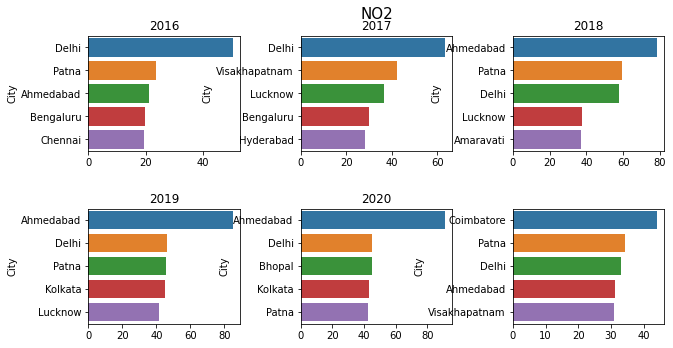

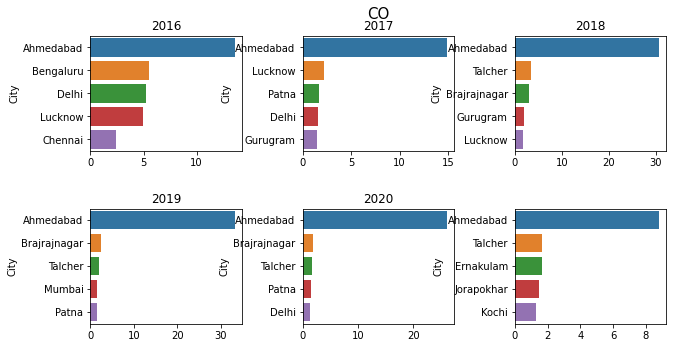

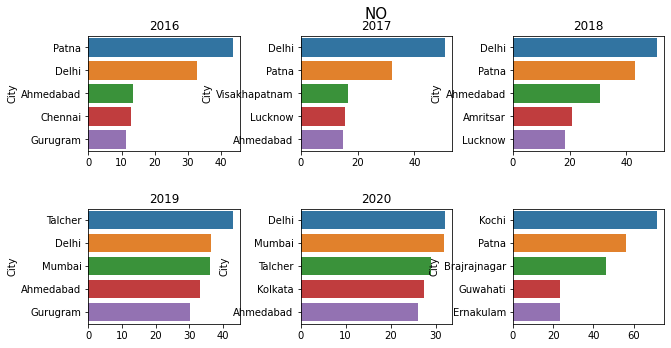

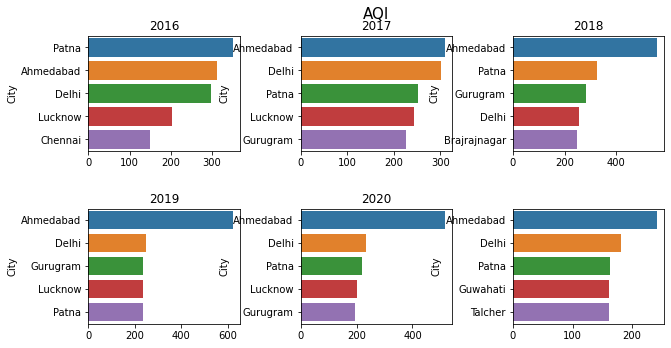

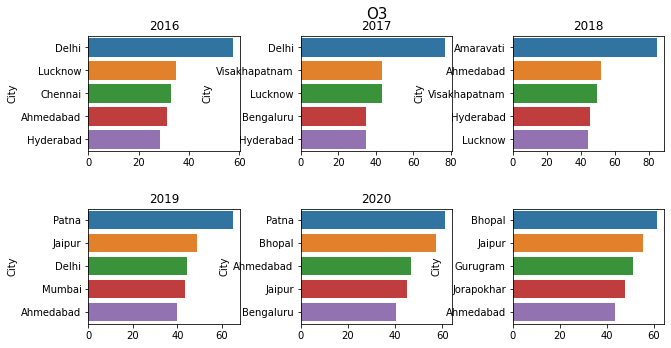

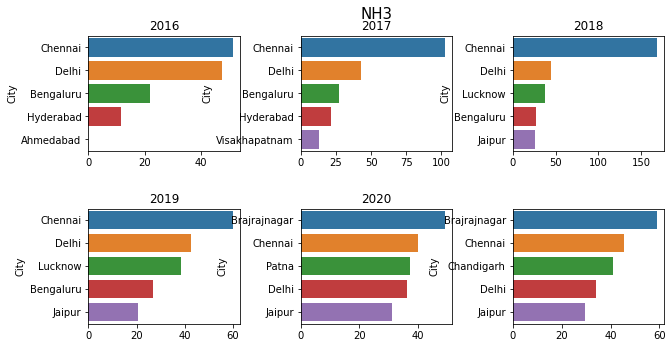

In [15]:
for j in columns :
    plt.figure(figsize = (10, 5))
    plt.suptitle(j, fontsize=15)
    for x,i in enumerate(data.Date.dt.year.unique()):
        plt.title(str(i))
        df=data[data.Date.dt.year==i].groupby(['City'])[j].mean().sort_values(ascending=False).head(5) 
        plt.subplot(2, 3, 1+x)
        plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.5)
        sns.barplot( x=df.values, y=df.index)
    

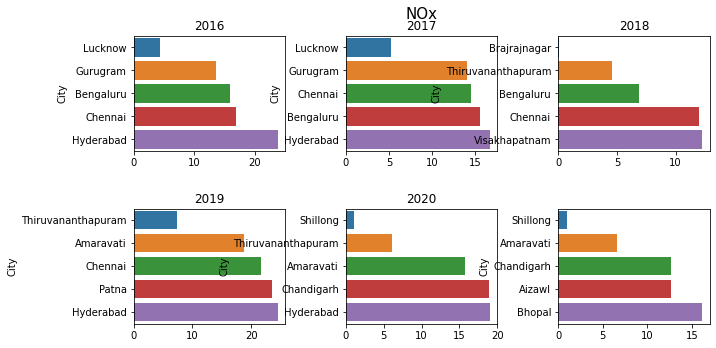

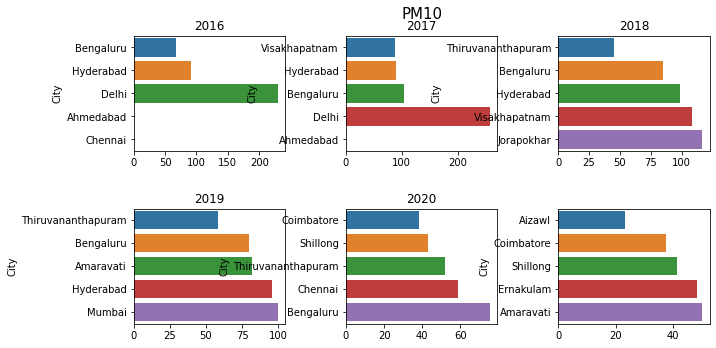

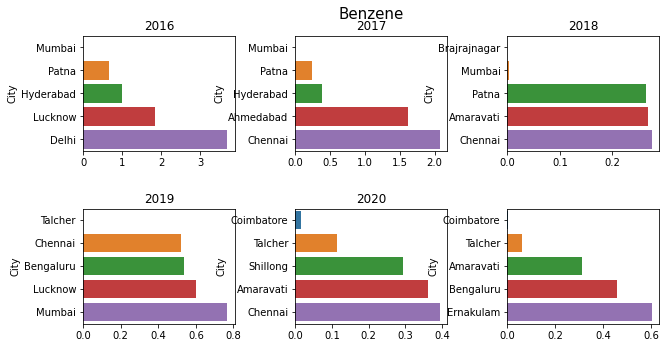

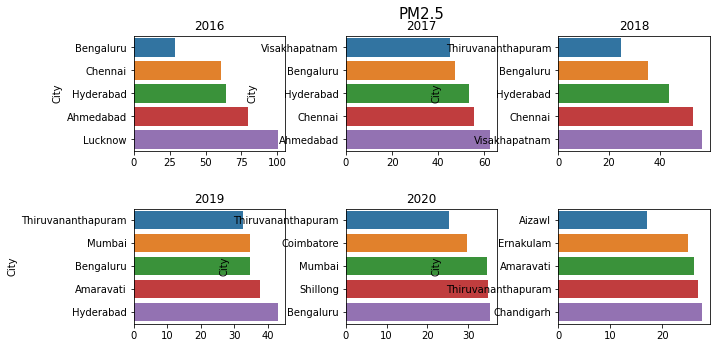

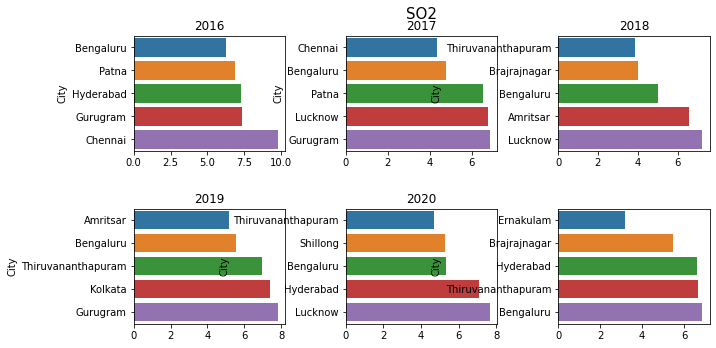

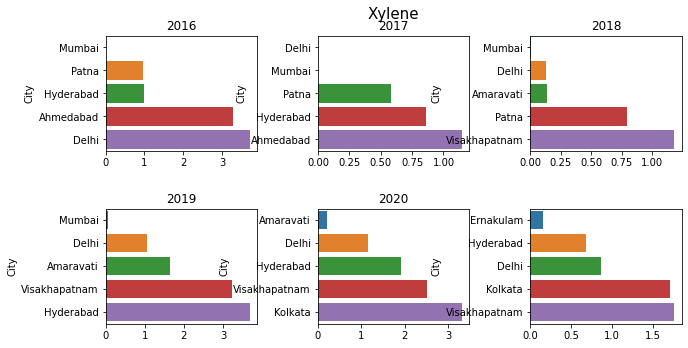

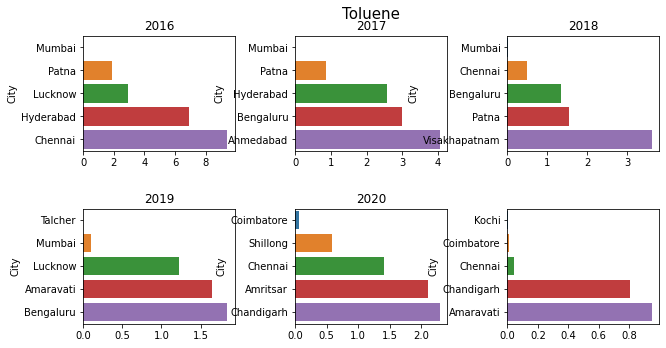

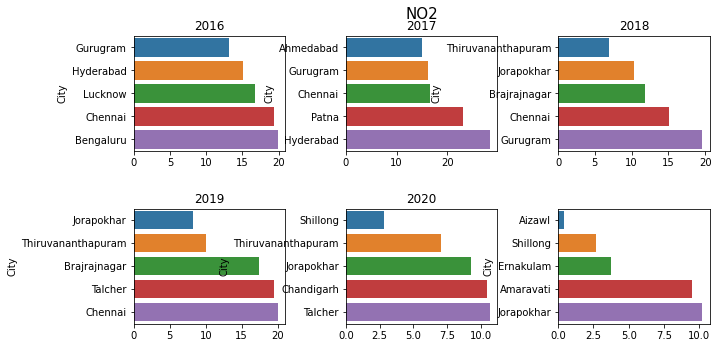

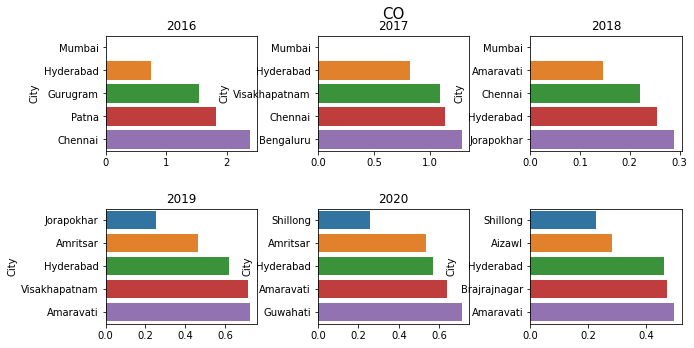

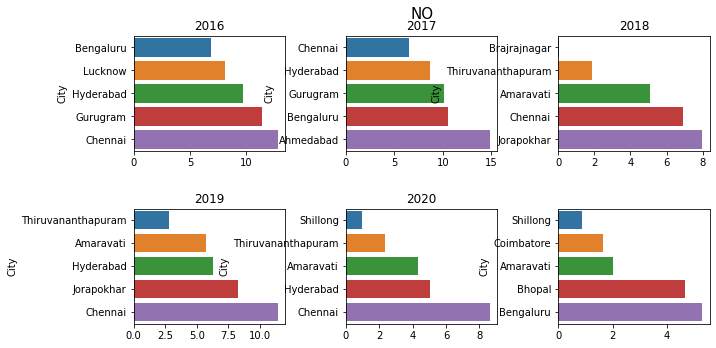

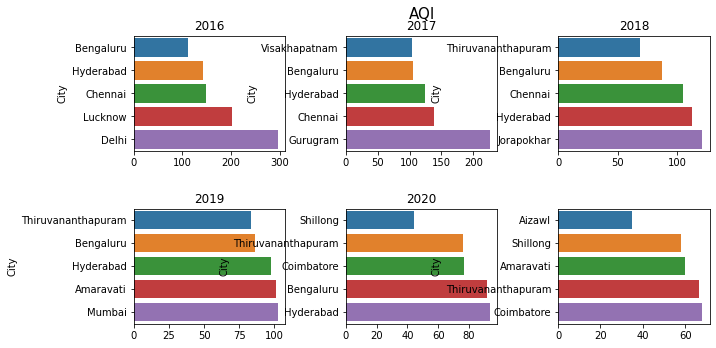

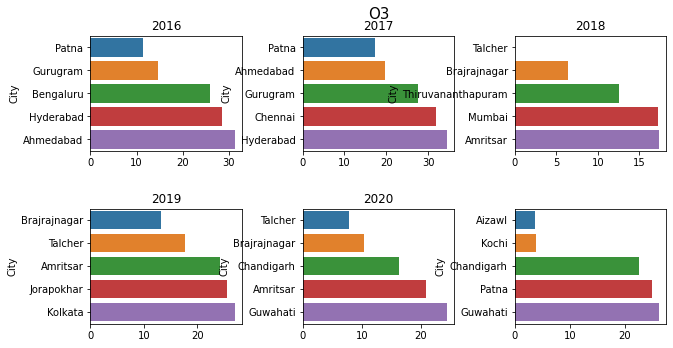

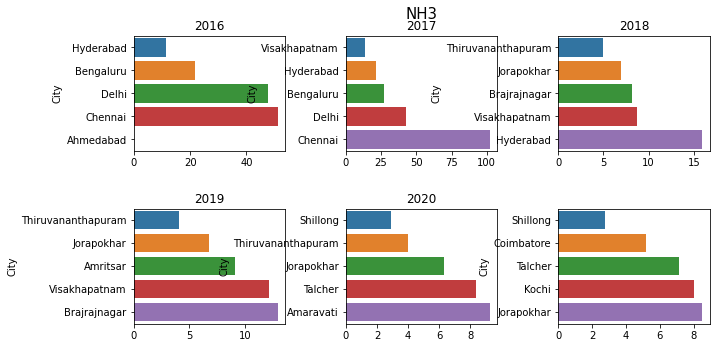

In [16]:
for j in columns :
    plt.figure(figsize = (10, 5))
    plt.suptitle(j, fontsize=15)
    for x,i in enumerate(data.Date.dt.year.unique()):
        plt.title(str(i))
        df=data[data.Date.dt.year==i].groupby(['City'])[j].mean().sort_values(ascending=True).head(5) 
        plt.subplot(2, 3, 1+x)
        plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.5)
        sns.barplot( x=df.values, y=df.index)

In [17]:
data[data['City']=='Ahmedabad']['AQI'].isna().mean()


0.3359880537580886

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


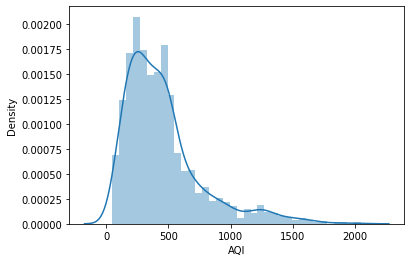

In [18]:
sns.distplot(data[data['City']=='Ahmedabad']['AQI'])


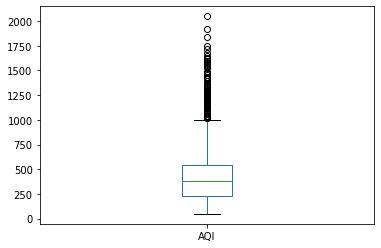

In [19]:
data[data['City']=='Ahmedabad'].boxplot( column =['AQI'], grid = False)


In [20]:
data[data['City']=='Ahmedabad']['AQI'].describe()


count    1334.000000
mean      452.122939
std       311.729553
min        48.000000
25%       231.000000
50%       384.500000
75%       542.750000
max      2049.000000
Name: AQI, dtype: float64

In [21]:
data[data.Date.dt.year==2015]['AQI'].describe()

count    1827.000000
mean      212.463054
std       133.119404
min        31.000000
25%       114.000000
50%       175.000000
75%       294.000000
max      1247.000000
Name: AQI, dtype: float64

In [22]:
data['AQI'].groupby(data.Date.dt.year).count()

Date
2015    1827
2016    2573
2017    3234
2018    5724
2019    7071
2020    4421
Name: AQI, dtype: int64

In [23]:
(data.groupby([data.Date.dt.year,'City'])['AQI'].count()>300).groupby(level=0).count()

Date
2015     9
2016    10
2017    17
2018    18
2019    23
2020    26
Name: AQI, dtype: int64

In [24]:
data[data.Date.dt.year==2019].groupby(['City'])['AQI'].mean().sort_values(ascending=True)

City
Shillong               44.476190
Thiruvananthapuram     76.236467
Coimbatore             77.026596
Bengaluru              91.602740
Hyderabad              93.980822
Amaravati              98.485437
Chennai               102.942466
Mumbai                107.950685
Amritsar              109.500000
Jaipur                120.512329
Visakhapatnam         123.442815
Guwahati              127.560897
Chandigarh            135.547009
Kolkata               143.909589
Brajrajnagar          148.400621
Jorapokhar            157.587459
Bhopal                162.609524
Talcher               169.023102
Gurugram              195.222527
Lucknow               202.561644
Patna                 218.259053
Delhi                 232.104110
Ahmedabad             516.352273
Name: AQI, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


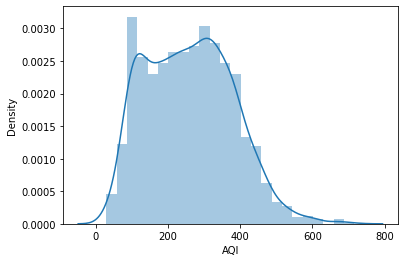

In [25]:
sns.distplot(data[data['City']=='Delhi']['AQI'])

In [26]:
pd.options.display.max_rows = 100
(data.groupby(['City',data.Date.dt.year])['AQI'].mean()).groupby(level=0).pct_change().groupby(level=0).mean().sort_values(ascending=True)

City
Chandigarh           -0.473278
Amaravati            -0.297994
Bhopal               -0.294313
Brajrajnagar         -0.164219
Amritsar             -0.143305
Kolkata              -0.129188
Jaipur               -0.121197
Patna                -0.118666
Coimbatore           -0.114608
Hyderabad            -0.113189
Chennai              -0.109377
Delhi                -0.089743
Talcher              -0.069656
Gurugram             -0.068835
Bengaluru            -0.062941
Lucknow              -0.038921
Visakhapatnam        -0.018590
Thiruvananthapuram    0.000564
Mumbai                0.005714
Ahmedabad             0.042247
Jorapokhar            0.100490
Guwahati              0.266126
Shillong              0.302485
Aizawl                     NaN
Ernakulam                  NaN
Kochi                      NaN
Name: AQI, dtype: float64

In [27]:
pd.options.display.max_rows = 10
data.groupby(['City',data.Date.dt.year])['AQI'].mean()
(data[data.Date.dt.year!=2020].groupby(['City',data.Date.dt.year])['AQI'].mean()).pct_change().groupby(level=0).mean()
pd.options.display.max_rows = 100
(data[data.Date.dt.year!=2020].groupby(['City',data.Date.dt.year])['AQI'].mean()).groupby(level=0).pct_change().groupby(level=0).mean().sort_values(ascending=True)

City
Amaravati            -0.250994
Brajrajnagar         -0.208279
Amritsar             -0.139509
Jaipur               -0.117934
Hyderabad            -0.099440
Talcher              -0.090025
Patna                -0.084180
Chennai              -0.081615
Kolkata              -0.073437
Delhi                -0.057858
Bengaluru            -0.046234
Gurugram             -0.029343
Lucknow               0.007425
Mumbai                0.052024
Thiruvananthapuram    0.064937
Visakhapatnam         0.079870
Ahmedabad             0.185608
Jorapokhar            0.189596
Bhopal                     NaN
Chandigarh                 NaN
Coimbatore                 NaN
Guwahati                   NaN
Shillong                   NaN
Name: AQI, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


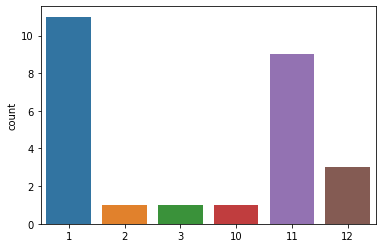

In [28]:
data.groupby(['City',data.Date.dt.month])['AQI'].mean().groupby(level=0).idxmax()
y=data.groupby(['City',data.Date.dt.month])['AQI'].mean().groupby(level=0).idxmax()
count_month=[i[1] for i in y]
sns.countplot(count_month)

In [29]:
data_pre=data.copy()
data_pre['AQI_Bucket'].map({'Poor':2, 'Very Poor':1, 'Severe':0, 'Moderate':3, 'Satisfactory':4,
       'Good':5})

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
29526    5.0
29527    4.0
29528    4.0
29529    4.0
29530    5.0
Name: AQI_Bucket, Length: 29531, dtype: float64

In [30]:
data_pre['AQI_Rank']=data_pre['AQI_Bucket'].map({'Poor':2, 'Very Poor':1, 'Severe':0, 'Moderate':3, 'Satisfactory':4,
       'Good':5})
data_pre

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,AQI_Rank
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,5.0
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,4.0
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,4.0
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,4.0


([<matplotlib.patches.Wedge at 0x7f71e0c01460>,
 [Text(1.099996949643506, 0.0025905163543849417, 'Good'),
  Text(0.9802247555406907, 0.49915872087462654, 'Moderate'),
  Text(0.08023474517842194, 1.0970699091972917, 'Poor'),
  Text(-0.6108580113768922, 0.9147964199408898, 'Satisfactory'),
  Text(-0.8941627614762476, -0.6406816338784587, 'Severe'),
  Text(0.9607250241956743, -0.5357307419629951, 'Very Poor')])

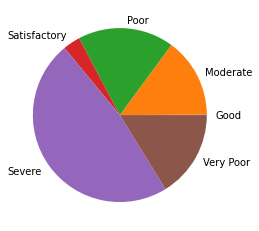

In [31]:
pd.options.display.max_rows = 1000

x=data_pre[data_pre['City']=='Ahmedabad'].groupby(['City','AQI_Bucket'])['AQI_Bucket'].count()
plt.pie(x/data_pre.groupby(['City'])['AQI_Bucket'].count(),labels=[i[1] for i in x.index])

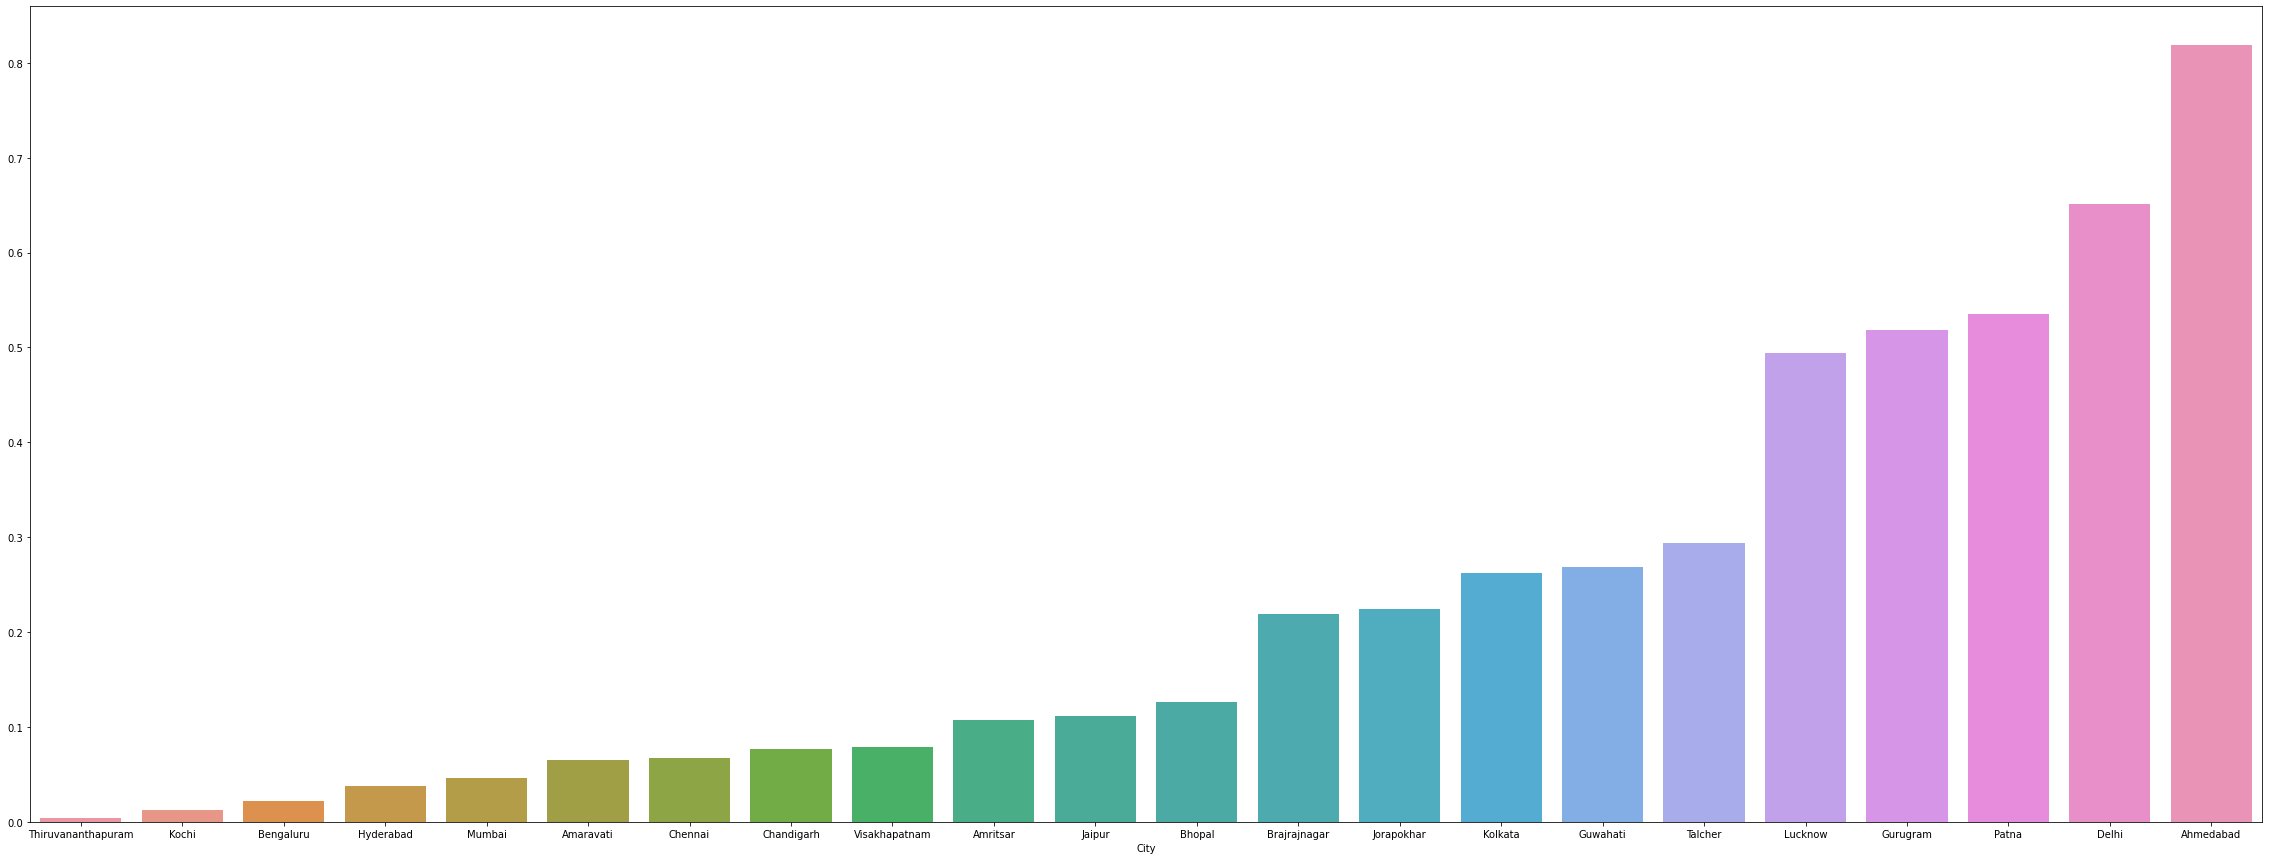

In [32]:
y=data_pre[data_pre['AQI_Rank']<=2].groupby(['City'])['AQI_Rank'].count()/data_pre.groupby(['City'])['AQI_Bucket'].count()
y.dropna(inplace=True)
fig, ax = plt.subplots(figsize=(40, 15))
sns.barplot(x=y.sort_values().index,y=y.sort_values().values)

In [33]:
dataset=data_pre[(data_pre['City']=='Delhi') & (data_pre.Date.dt.year<2019  )]['AQI'].dropna()
dataset=np.array(dataset)

In [35]:
tf.random.set_seed(7)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset=dataset.reshape(-1,1)
dataset = scaler.fit_transform(dataset)

In [36]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

972 479


In [38]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [39]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.add(Dropout(0.2))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
941/941 - 4s - loss: 0.0418 - 4s/epoch - 4ms/step
Epoch 2/100
941/941 - 3s - loss: 0.0413 - 3s/epoch - 3ms/step
Epoch 3/100
941/941 - 4s - loss: 0.0391 - 4s/epoch - 4ms/step
Epoch 4/100
941/941 - 4s - loss: 0.0407 - 4s/epoch - 4ms/step
Epoch 5/100
941/941 - 2s - loss: 0.0386 - 2s/epoch - 2ms/step
Epoch 6/100
941/941 - 2s - loss: 0.0390 - 2s/epoch - 2ms/step
Epoch 7/100
941/941 - 2s - loss: 0.0354 - 2s/epoch - 2ms/step
Epoch 8/100
941/941 - 2s - loss: 0.0405 - 2s/epoch - 2ms/step
Epoch 9/100
941/941 - 2s - loss: 0.0409 - 2s/epoch - 2ms/step
Epoch 10/100
941/941 - 2s - loss: 0.0407 - 2s/epoch - 2ms/step
Epoch 11/100
941/941 - 2s - loss: 0.0373 - 2s/epoch - 2ms/step
Epoch 12/100
941/941 - 2s - loss: 0.0348 - 2s/epoch - 2ms/step
Epoch 13/100
941/941 - 2s - loss: 0.0400 - 2s/epoch - 2ms/step
Epoch 14/100
941/941 - 2s - loss: 0.0430 - 2s/epoch - 2ms/step
Epoch 15/100
941/941 - 2s - loss: 0.0381 - 2s/epoch - 2ms/step
Epoch 16/100
941/941 - 2s - loss: 0.0377 - 2s/epoch - 2ms/step
E

In [40]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

14/14 [==============================] - 0s 2ms/step
Train Score: 77.01 RMSE
Test Score: 76.18 RMSE


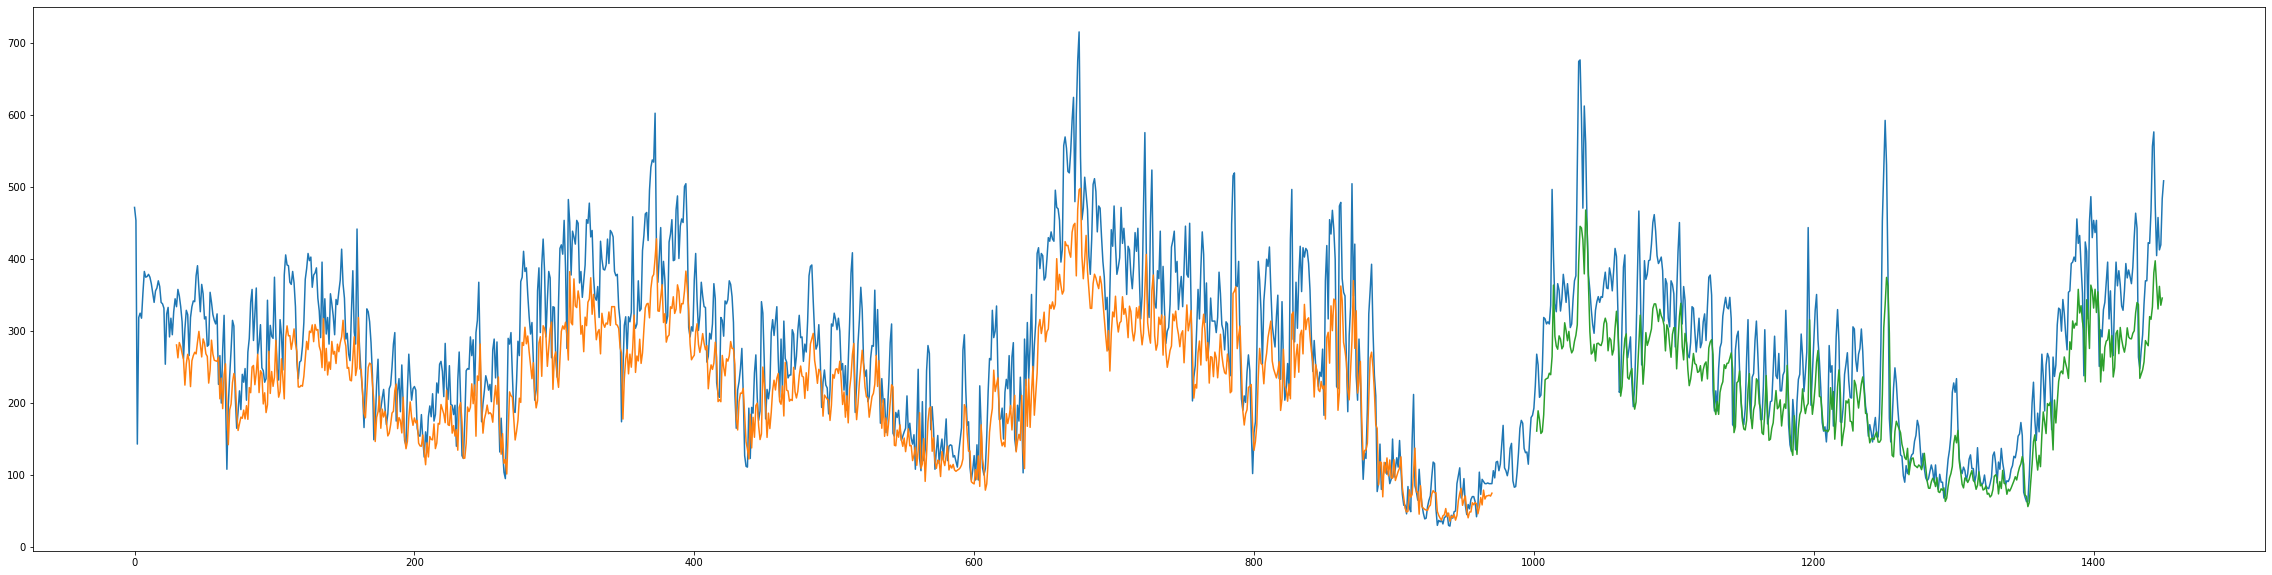

In [42]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
fig, ax = plt.subplots(figsize=(40, 10))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
